In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba
import seaborn as sns

## 数据聚合

In [3]:
'''
训练数据聚合
'''
def data_meger(query_path, reply_path, train:bool):
    query = pd.read_csv(query_path, sep='\t', header=None)
    query.columns = ['id', 'query']
    reply = pd.read_csv(reply_path, sep='\t', header=None)
    if train:
        reply.columns = ['id', 'reply_sort','reply', 'label']
    else:
        reply.columns = ['id', 'reply_sort','reply']
    new_data = pd.DataFrame()
    new_data['id'] = reply['id']
    new_data['query'] = [query.iloc[i]['query'] for i in reply['id']]
    new_data['reply'] = reply['reply']
    new_data['reply_sort'] = reply['reply_sort']
    if train:
        new_data['label'] = reply['label']
    new_data['query_cut'] = new_data['query'].apply(lambda x: ' '.join(list(jieba.cut(str(x)))))
    new_data['reply_cut'] = new_data['reply'].apply(lambda x: ' '.join(list(jieba.cut(str(x)))))
    new_data = new_data.dropna()
    return new_data

In [4]:
train_data = data_meger('./data/train.query.tsv', './data/train.reply.tsv', train=True)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.579 seconds.
Prefix dict has been built successfully.


In [5]:
test_data = data_meger('./data/test.query.tsv', './data/test.reply.tsv', train=False)

In [6]:
train_data.head()

,id,query,reply,reply_sort,label,query_cut,reply_cut
0,0,采荷一小是分校吧,杭州市采荷第一小学钱江苑校区，杭州市钱江新城实验学校。,0,1,采荷 一小 是 分校 吧,杭州市 采荷 第一 小学 钱江苑 校区 ， 杭州市 钱江 新城 实验学校 。
1,0,采荷一小是分校吧,是的,1,0,采荷 一小 是 分校 吧,是 的
2,0,采荷一小是分校吧,这是5楼,2,0,采荷 一小 是 分校 吧,这是 5 楼
3,1,毛坯吗？,因为公积金贷款贷的少,0,0,毛坯 吗 ？,因为 公积金 贷款 贷 的 少
4,1,毛坯吗？,是呢,1,0,毛坯 吗 ？,是 呢


In [7]:
test_data.head()

,id,query,reply,reply_sort,query_cut,reply_cut
0,0,东区西区？什么时候下证？,我在给你发套,0,东区 西区 ？ 什么 时候 下证 ？,我 在 给 你 发套
1,0,东区西区？什么时候下证？,您看下我发的这几套,1,东区 西区 ？ 什么 时候 下证 ？,您 看 下 我 发 的 这 几套
2,0,东区西区？什么时候下证？,这两套也是金源花园的,2,东区 西区 ？ 什么 时候 下证 ？,这 两套 也 是 金源 花园 的
3,0,东区西区？什么时候下证？,价钱低,3,东区 西区 ？ 什么 时候 下证 ？,价钱 低
4,0,东区西区？什么时候下证？,便宜的房子，一般都是顶楼,4,东区 西区 ？ 什么 时候 下证 ？,便宜 的 房子 ， 一般 都 是 顶楼


In [8]:
train_data.to_csv('./data/train.csv', index=False)
test_data.to_csv('./data/test.csv', index=False)

## 数据分析

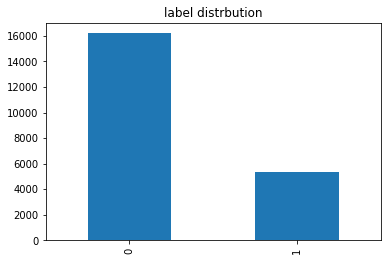

In [34]:
ds = train_data['label'].value_counts()
ds.plot.bar()
plt.title('label distrbution')
plt.show()

In [36]:
print('问题数: {}, 答案数: {}'.format(len(train_data['query'].unique()), len(train_data['reply'].unique())))

问题数: 4230, 答案数: 16838


In [57]:
train_data['query_cut'] = train_data['query'].apply(lambda x: ' '.join(list(jieba.cut(str(x)))))
train_data['reply_cut'] = train_data['reply'].apply(lambda x: ' '.join(list(jieba.cut(str(x)))))

In [14]:
train_data.head()

,query,reply,reply_sort,label,query_cut,reply_cut
0,采荷一小是分校吧,杭州市采荷第一小学钱江苑校区，杭州市钱江新城实验学校。,0,1,采荷 一小 是 分校 吧,杭州市 采荷 第一 小学 钱江苑 校区 ， 杭州市 钱江 新城 实验学校 。
1,采荷一小是分校吧,是的,1,0,采荷 一小 是 分校 吧,是 的
2,采荷一小是分校吧,这是5楼,2,0,采荷 一小 是 分校 吧,这是 5 楼
3,毛坯吗？,因为公积金贷款贷的少,0,0,毛坯 吗 ？,因为 公积金 贷款 贷 的 少
4,毛坯吗？,是呢,1,0,毛坯 吗 ？,是 呢


In [61]:
21584 * 0.2

4316.8

In [33]:
train_data['query_len'] = train_data['query'].apply(lambda x:len(x))
train_data['reply_len'] = train_data['reply'].apply(lambda x:len(x))

In [34]:
print(train_data['query_len'].describe(), train_data['reply_len'].describe())

count    21584.000000
mean         9.150806
std          5.045822
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         65.000000
Name: query_len, dtype: float64 count    21584.000000
mean        10.410350
std         10.537412
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        200.000000
Name: reply_len, dtype: float64


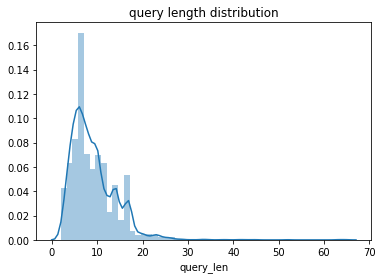

In [35]:
ds = train_data['query_len']
g = sns.distplot(ds)
plt.title('query length distribution')
plt.show()

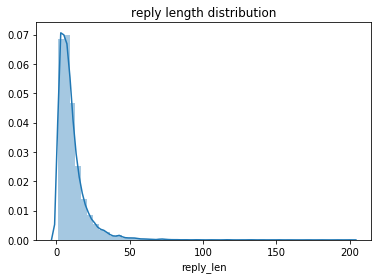

In [36]:
ds = train_data['reply_len']
g = sns.distplot(ds)
plt.title('reply length distribution')
plt.show()

In [25]:
train_data['reply_sort'].value_counts()

1    6000
0    6000
2    5684
3    2071
4    1830
Name: reply_sort, dtype: int64

In [29]:
train_data.isnull().sum()

query         0
reply         1
reply_sort    0
label         0
query_cut     0
reply_cut     0
query_len     0
reply_len     0
dtype: int64

## 测试集分析

In [37]:
test_data['query_len'] = test_data['query_cut'].apply(lambda x:len(x))
test_data['reply_len'] = test_data['reply_cut'].apply(lambda x:len(x))

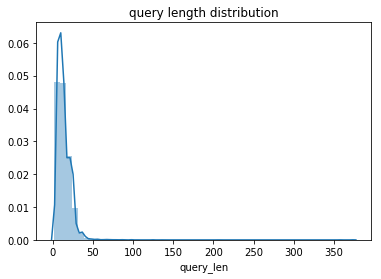

In [38]:
ds = test_data['query_len']
g = sns.distplot(ds)
plt.title('query length distribution')
plt.show()

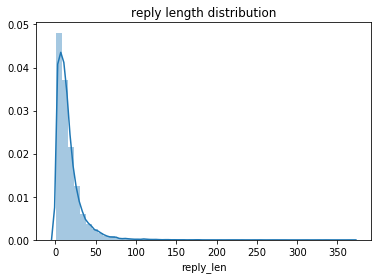

In [39]:
ds = test_data['reply_len']
g = sns.distplot(ds)
plt.title('reply length distribution')
plt.show()

In [43]:
test_data['query_len'].describe(), test_data['reply_len'].describe()

(count    53757.000000
 mean        13.857005
 std          9.770729
 min          2.000000
 25%          8.000000
 50%         12.000000
 75%         18.000000
 max        374.000000
 Name: query_len, dtype: float64, count    53757.000000
 mean        16.546273
 std         17.405339
 min          1.000000
 25%          6.000000
 50%         12.000000
 75%         21.000000
 max        367.000000
 Name: reply_len, dtype: float64)